# SCRAPING BOOKS & CHARACTERS FROM WIKI

## Importing the Libraries

In [10]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [15]:
driver = webdriver.Chrome() # Driver Object to Access our browser

In [16]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url) # go to url

In [24]:
from selenium.webdriver.common.by import By

# driver.find_element(By.XPATH, "//div[text() = 'ACCEPT']").click() # Bypass Cookie Request

### Scraping Process

#### Gather Book Categories

In [36]:
book_cats = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [37]:
i = 1
for category in book_cats:
    print(str(i) + " " + category.text)
    i += 1

1 Category:Baptism of Fire characters
2 Category:Blood of Elves characters
3 Godamba Thaess'en
4 Category:Season of Storms characters
5 Category:Something Ends, Something Begins characters
6 Category:Sword of Destiny characters
7 Category:Szpony i kły characters
8 Category:Tales from the world of The Witcher characters
9 Category:The Lady of the Lake characters
10 Category:The Last Wish characters
11 Category:The Tower of the Swallow characters
12 Category:Time of Contempt characters


In [38]:
for category in book_cats:
    print(category.get_attribute("href"))

https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters
https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters
https://witcher.fandom.com/wiki/Godamba_Thaess%27en
https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters
https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters
https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters
https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters
https://witcher.fandom.com/wiki/Category:Tales_from_the_world_of_The_Witcher_characters
https://witcher.fandom.com/wiki/Category:The_Lady_of_the_Lake_characters
https://witcher.fandom.com/wiki/Category:The_Last_Wish_characters
https://witcher.fandom.com/wiki/Category:The_Tower_of_the_Swallow_characters
https://witcher.fandom.com/wiki/Category:Time_of_Contempt_characters


In [39]:
driver.get(book_cats[0].get_attribute("href"))

### Gather Character Names

Using the driver's function to find the character names by html class name

In [40]:
character_names = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [42]:
i = 1
for name in character_names:
    print(str(i) + " " + name.text)
    i += 1

1 Adalia
2 Adela
3 Aen Saevherne
4 Aevenien
5 Aglaïs
6 Albrich
7 Amavet
8 Angus Bri Cri
9 Anna Kameny
10 Anzelm Aubry
11 Artaud Terranova
12 Asse
13 Assire var Anahid
14 Aubry (first born)
15 Augusta Wagner
16 Baron of Casadei
17 Beatrix of Kovir
18 Bronik
19 Brouver Hoog
20 Cahir Mawr Dyffryn aep Ceallach
21 Calanthe
22 Caleb Stratton
23 Carduin
24 Ceallach aep Gruffyd
25 Cerro
26 Ciaran aep Dearbh
27 Ciri
28 Cirilla Fiona (imposter)
29 Codringher
30 Coinneach Dá Reo
31 Connor
32 Coram I
33 Coram II
34 Corbett
35 Cosmo Baldenvegg
36 Count Lanier
37 Cregennan of Lod
38 Crispin
39 Dagorad
40 Dandelion
41 Daniel Etcheverry
42 Demavend III
43 Echel Traighlethan
44 Effenberg
45 Eithné
46 Elan Trahe
47 Elen of Kaedwen
48 Emhyr var Emreis
49 Emiel Regis Rohellec Terzieff-Godefroy
50 Ethain
51 Falka
52 Falka (alias)
53 Fauve
54 Field Marshal Windbag
55 Figgis Merluzzo
56 Fiona
57 Flourens Delannoy
58 Francesca Findabair
59 Fringilla Vigo
60 Geralt of Rivia
61 Gerhart of Aelle
62 Giselher
63 G

### Streamline the whole scraping process.

In [49]:
driver = webdriver.Chrome() # Driver Object to Access our browser

page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url) # go to url

book_cats = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

books_list = []
for cats in book_cats:
    book_link = cats.get_attribute("href")
    book_cat = cats.text
    books_list.append({'book_cat': book_cat, 'book_link': book_link})
    
characters_list = []
for book in books_list:
    driver.get(book['book_link'])
    character_names = driver.find_elements(By.CLASS_NAME, "category-page__member-link")
    
    for name in character_names:
        characters_list.append({"book_cat": book["book_cat"], "character_name": name.text})
        
witcher_character_df = pd.DataFrame(characters_list)

Plotting the number of characters present in each books.

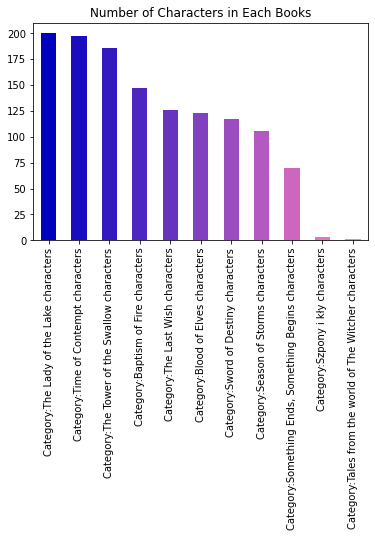

In [61]:
import matplotlib.pyplot as plt
from itertools import cycle, islice

# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(witcher_character_df)))
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(witcher_character_df))]
witcher_character_df["book_cat"].value_counts().plot(kind="bar", color=my_colors)
plt.title("Number of Characters in Each Books")
plt.show()

Saving the character names in csv

In [62]:
witcher_character_df.to_csv('witcher_characters.csv', index=False)